In [1]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from matplotlib import pyplot as plt

!nbqa flake8 boids.ipynb
print("hello world")

hello world


No such file or directory: boids.ipynb


In [2]:
def generate_boid_attributes(lower, upper, n=10):
    width = upper - lower
    attributes = np.random.random_sample(size=(2, n)) * width[:, np.newaxis]
    attributes += lower[:, np.newaxis]
    return attributes


expected = (2, 10)
actual = generate_boid_attributes(np.array([0, 0]), np.array([1, 1])).shape
assert expected == actual

In [3]:
lower_p = np.array([150, 300])  # x-lower, y-lower
upper_p = np.array([200, 400])  # x-upper, y-upp

positions = generate_boid_attributes(lower_p, upper_p)
positions

array([[166.95357953, 174.64667657, 183.0927416 , 163.18136653,
        175.99858485, 164.98054078, 199.87013446, 178.32842708,
        199.12932   , 186.95685349],
       [322.81103045, 358.61612811, 374.41157822, 347.12465443,
        350.15731617, 301.83379493, 338.10108133, 351.13829163,
        310.2081688 , 326.17450212]])

In [4]:
lower_v = np.array([5, -10])  # x-lower, y-lower
upper_v = np.array([15, 5])  # x-upper, y-upp

velocities = generate_boid_attributes(lower_v, upper_v)
velocities

array([[ 1.06770736e+01,  9.07101813e+00,  5.01613998e+00,
         5.22843397e+00,  1.42106442e+01,  9.97381652e+00,
         1.11880221e+01,  1.35834334e+01,  5.38525242e+00,
         1.12876659e+01],
       [-9.13014296e+00, -6.54108897e+00,  1.89949690e+00,
        -8.86712789e+00,  4.14766653e+00,  4.73353974e+00,
         1.47415649e+00, -1.29503294e-02,  1.63637880e+00,
         1.00778577e+00]])

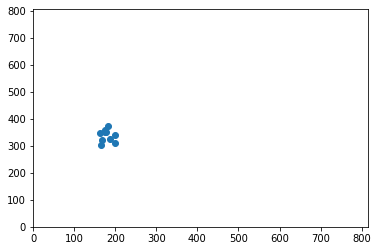

In [5]:
plt.xlim(0, 4 * upper_p[0] + upper_v[0])
plt.ylim(0, 2 * upper_p[1] + upper_v[1])

scatter = plt.scatter(positions[0, :], positions[1:])

In [6]:
def update_boids(positions, velocities):
    """Updates the boid positions."""
    positions += velocities


def animate(frame):
    """Updates the scatter plot."""
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [ ]:
anim = animation.FuncAnimation(scatter.figure, animate, frames=50, interval=50)

HTML(anim.to_jshtml())

In [ ]:
test_pos = np.array([[1.0,2.0,3.0],[1.0,2.0,3.0]])
test_vel = np.array([[1.0,1.0,1.0],[1.0,1.0,1.0]])
update_boids(test_pos, test_vel)
np.testing.assert_array_equal(test_pos, np.array([[2.1, 3. , 3.9],
       [2.1, 3. , 3.9]]))
